In [43]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [44]:
# Reading the train data

train = pd.read_csv(r"C:\Users\Lavanya\Downloads\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project\train.csv")
train.head()

id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   

   malignant  highly_malignant  rude  threat  abuse  loathe  
0          0                 0     0       0      0       0  
1          0                 0     0       0      0       0  
2          0                 0     0       0      0       0  
3          0                 0     0       0      0       0  
4          0                 0     0       0      0       0

In [45]:
# Reading the test data

test = pd.read_csv(r"C:\Users\Lavanya\Downloads\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project\test.csv")
test.head()

id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3  00017563c3f7919a  :If you have a look back at the source, the in...
4  00017695ad8997eb          I don't anonymously edit articles at all.

In [46]:
# Size of test and train data

print("Train:")
print(train.shape)
print('\n')
print("Test:")
print(test.shape)

Train:
(159571, 8)


Test:
(153164, 2)


Train data consists of 8 columns with id being unique. The 'comment_text' column shows the comment made that needs to be classified into 6 different categories represented by the remaining columns - malignant, highly_malignant, rude, threat, abuse, loathe.

It consits of two columns - the id and the comment_text. We use the trained model to predict the probability of all other columns mentioned in train data.

The column - comment_text as the name suggests comprises text data that needs to be explored to achieve classification on our target variables. In this set we have six target variables - malignant, highly_malignant, rude, threat, abuse, loathe. Building a model that differentiates between these targets through predicting probabilities for each class is necessary.

In [47]:
# Setting id column as index

train.set_index("id",inplace=True)
test.set_index("id",inplace=True)

The id column being unique in both test and train data does not provide significant information about the target, but it may be required to recognize the origin of the comment, hence for further reference it is set as index.

In [48]:
# creating a column that adds of the row entries

train['bad'] =train[col].sum(axis =1)

In [49]:
train.head()

comment_text  \
id                                                                    
0000997932d777bf  Explanation\nWhy the edits made under my usern...   
000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   

                  malignant  highly_malignant  rude  threat  abuse  loathe  \
id                                                                           
0000997932d777bf          0                 0     0       0      0       0   
000103f0d9cfb60f          0                 0     0       0      0       0   
000113f07ec002fd          0                 0     0       0      0       0   
0001b41b1c6bb37e          0                 0     0       0      0       0   
0001d958c54c6e35          0                 0     0       0      0       0   

                  bad  
id                     
0000997932d777bf    0  
000103f0d9cfb60f    0  
000113f07ec002fd    0  
0001b41b1c6bb37e    0  
0001d958c54c6e35    0

In [50]:
test.head()

comment_text
id                                                                 
00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
0000247867823ef7  == From RfC == \n\n The title is fine as it is...
00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
00017563c3f7919a  :If you have a look back at the source, the in...
00017695ad8997eb          I don't anonymously edit articles at all.

malignant :
0    144277
1     15294
Name: malignant, dtype: int64


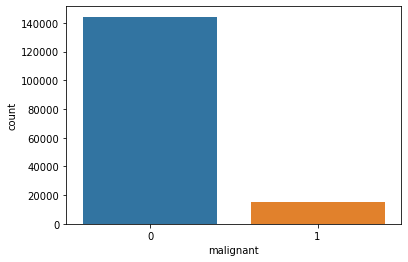

highly_malignant :
0    157976
1      1595
Name: highly_malignant, dtype: int64


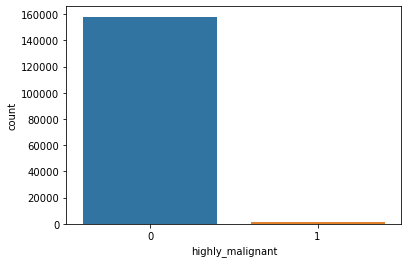

loathe :
0    158166
1      1405
Name: loathe, dtype: int64


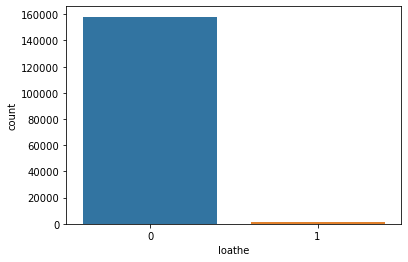

rude :
0    151122
1      8449
Name: rude, dtype: int64


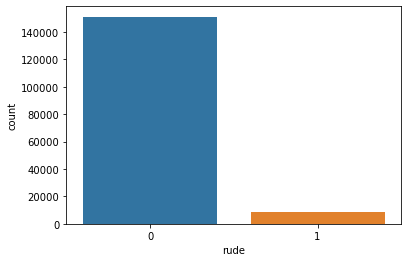

abuse :
0    151694
1      7877
Name: abuse, dtype: int64


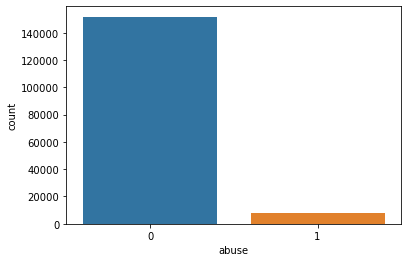

threat :
0    159093
1       478
Name: threat, dtype: int64


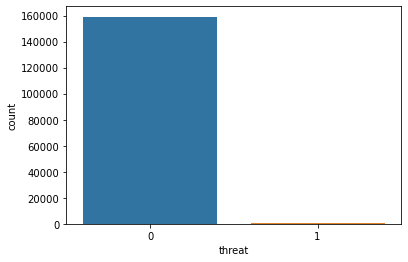

In [51]:
# visualizing the counts of the labels

col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    print(i,':')
    print(train[i].value_counts())
    sns.countplot(train[i])
    plt.show()

The comments classified as malignant, abuse and rude are of higher count as compared to the others which are still only ten percent of the total data.

It is clear from the countplots that the data set is imbalanced with significantly higher number of 0 values. It is necessary to treat this imbalance.

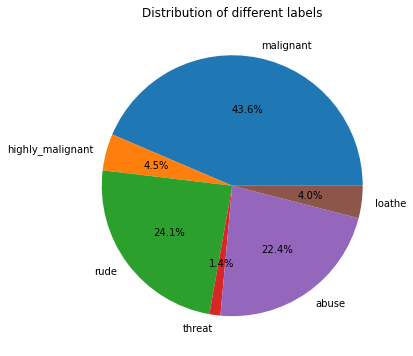

In [52]:
# Distribution of different labels

data = train.iloc[:,1:-1].sum()
plt.figure(figsize=[10,6])
labels = data.keys()
plt.pie(data, autopct="%.1f%%",labels=labels)
plt.title('Distribution of different labels')
plt.show()

Malignant comments occupy nearly half of the offensive comments with 43.6 percent. Next comes rude and abuse comments with 24.1 and 22.4 percent respectively. highly malignant, loathe and treats together form less than ten percent of offensive comments.

In [53]:
# Creating a new column - length 

train['length'] = train['comment_text'].str.len()
train.head()

comment_text  \
id                                                                    
0000997932d777bf  Explanation\nWhy the edits made under my usern...   
000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   

                  malignant  highly_malignant  rude  threat  abuse  loathe  \
id                                                                           
0000997932d777bf          0                 0     0       0      0       0   
000103f0d9cfb60f          0                 0     0       0      0       0   
000113f07ec002fd          0                 0     0       0      0       0   
0001b41b1c6bb37e          0                 0     0       0      0       0   
0001d958c54c6e35          0                 0     0       0      0       0   

                  bad  length  
id                             
0000997932d777bf    0     264  
000103f0d9cfb60f    0     112  
000113f07ec002fd    0     233  
0001b41b1c6bb37e    0     622  
0001d958c54c6e35    0      67

In [54]:
test['length'] = test['comment_text'].str.len()
test.head()

comment_text  length
id                                                                         
00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...     367
0000247867823ef7  == From RfC == \n\n The title is fine as it is...      50
00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...      54
00017563c3f7919a  :If you have a look back at the source, the in...     205
00017695ad8997eb          I don't anonymously edit articles at all.      41

In [55]:
# Importing necessary libraries for text exploration

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import  stopwords
import string
import re

In [56]:
# all text to lower case
train['comment_text']=train['comment_text'].str.lower()

In [57]:
test['comment_text']=test['comment_text'].str.lower()

In [58]:
# Defining a function for cleaning and tokenising of text data

def clean_text(text):
    
    # removing punctuations
    no_punct=[words for words in text if words not in string.punctuation]
    words_no_punct=''.join(no_punct)
    
    # removing special charecters
    no_sp = re.sub(r'[^a-zA-z0-9.,!?/:;\"\'\s]', '', words_no_punct)
    
    # removing numbers
    no_num = re.sub(r'[^a-zA-z.,!?/:;\"\'\s]', '', no_sp)
    
    # tokenize and remove stopwords
    clean_txt = [word for word in no_num.split() if word not in stopwords.words('english')] 
    
    return clean_txt

In [59]:
# Applying the function to get cleaned text
train['cleaned_text']= train['comment_text'].apply(clean_text)

In [60]:
test['cleaned_text']= test['comment_text'].apply(clean_text)

In [61]:
# Adding another column for the length of cleaned text
train['clean_length'] = train.cleaned_text.str.len()
train.head()

comment_text  \
id                                                                    
0000997932d777bf  explanation\nwhy the edits made under my usern...   
000103f0d9cfb60f  d'aww! he matches this background colour i'm s...   
000113f07ec002fd  hey man, i'm really not trying to edit war. it...   
0001b41b1c6bb37e  "\nmore\ni can't make any real suggestions on ...   
0001d958c54c6e35  you, sir, are my hero. any chance you remember...   

                  malignant  highly_malignant  rude  threat  abuse  loathe  \
id                                                                           
0000997932d777bf          0                 0     0       0      0       0   
000103f0d9cfb60f          0                 0     0       0      0       0   
000113f07ec002fd          0                 0     0       0      0       0   
0001b41b1c6bb37e          0                 0     0       0      0       0   
0001d958c54c6e35          0                 0     0       0      0       0   

                  bad  length  \
id                              
0000997932d777bf    0     264   
000103f0d9cfb60f    0     112   
000113f07ec002fd    0     233   
0001b41b1c6bb37e    0     622   
0001d958c54c6e35    0      67   

                                                       cleaned_text  \
id                                                                    
0000997932d777bf  [explanation, edits, made, username, hardcore,...   
000103f0d9cfb60f  [daww, matches, background, colour, im, seemin...   
000113f07ec002fd  [hey, man, im, really, trying, edit, war, guy,...   
0001b41b1c6bb37e  [cant, make, real, suggestions, improvement, w...   
0001d958c54c6e35         [sir, hero, chance, remember, page, thats]   

                  clean_length  
id                              
0000997932d777bf            26  
000103f0d9cfb60f            11  
000113f07ec002fd            22  
0001b41b1c6bb37e            49  
0001d958c54c6e35             6

In [62]:
test['clean_length'] = test.cleaned_text.str.len()
test.head()

comment_text  length  \
id                                                                            
00001cee341fdb12  yo bitch ja rule is more succesful then you'll...     367   
0000247867823ef7  == from rfc == \n\n the title is fine as it is...      50   
00013b17ad220c46  " \n\n == sources == \n\n * zawe ashton on lap...      54   
00017563c3f7919a  :if you have a look back at the source, the in...     205   
00017695ad8997eb          i don't anonymously edit articles at all.      41   

                                                       cleaned_text  \
id                                                                    
00001cee341fdb12  [yo, bitch, ja, rule, succesful, youll, ever, ...   
0000247867823ef7                            [rfc, title, fine, imo]   
00013b17ad220c46                   [sources, zawe, ashton, lapland]   
00017563c3f7919a  [look, back, source, information, updated, cor...   
00017695ad8997eb                [dont, anonymously, edit, articles]   

                  clean_length  
id                              
00001cee341fdb12            45  
0000247867823ef7             4  
00013b17ad220c46             4  
00017563c3f7919a            16  
00017695ad8997eb             4

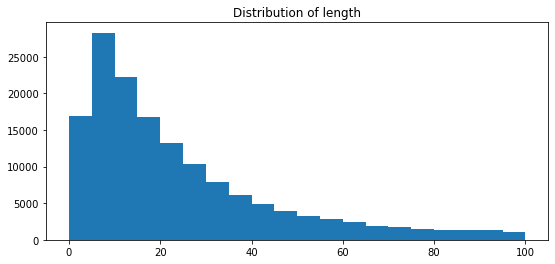

In [63]:
# Histogram sto understand the distribution of length

plt.figure(figsize=(9,4))
plt.hist(train['clean_length'],bins=20,range = (0,100))
plt.title("Distribution of length")
plt.show()

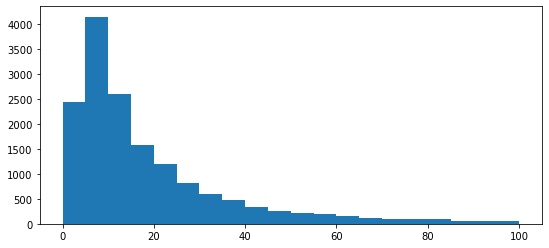

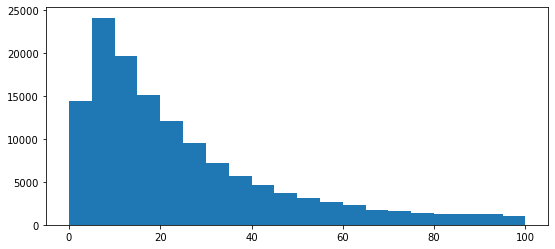

In [64]:
# Whether length of the comment varies in toxic comments

df1 = train[train['bad']!= 0] # offensive
df2 = train[train['bad']== 0] # non-offensive
for i in [df1,df2]:
    plt.figure(figsize=(9,4))
    plt.hist(i['clean_length'],bins=20,range = (0,100))
    plt.show()

In both offensive and non-offensive comments we can see that the length is typically 0-20 words, it does not differ much in the different cases.

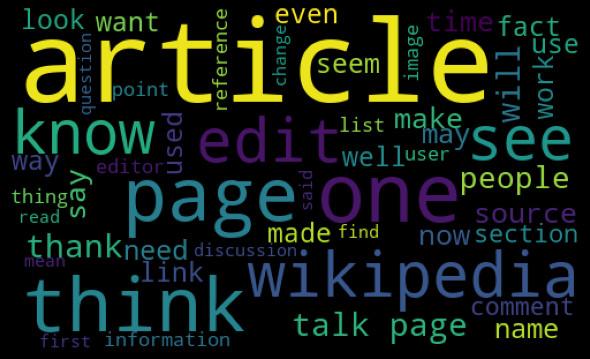

In [65]:
# Getting sense of loud words in non offensive comments

from wordcloud import WordCloud
nt = train['comment_text'][train['bad']==0]
nt_cloud = WordCloud(width=500,height=300,background_color='black',max_words=50).generate(' '.join(nt))
plt.figure(figsize=(8,5),facecolor='k')
plt.imshow(nt_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

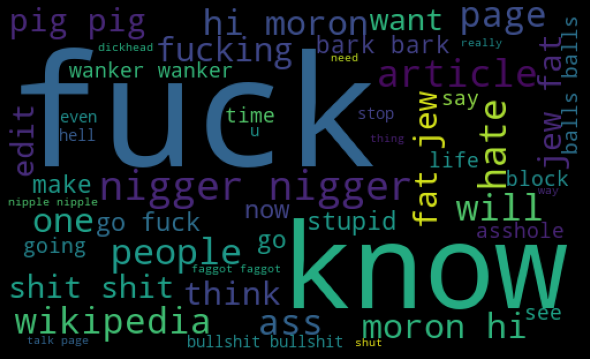

In [66]:
# Loud words in malignant comments

mal = train['comment_text'][train['malignant']==1]
mal_cloud = WordCloud(width=500,height=300,background_color='black',max_words=50).generate(' '.join(mal))
plt.figure(figsize=(8,5),facecolor='k')
plt.imshow(mal_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

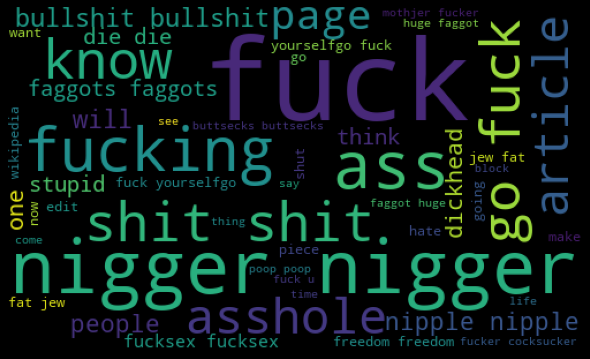

In [67]:
# Loud words in rude comments

rude = train['comment_text'][train['rude']==1]
rude_cloud = WordCloud(width=500,height=300,background_color='black',max_words=50).generate(' '.join(rude))
plt.figure(figsize=(8,5),facecolor='k')
plt.imshow(rude_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

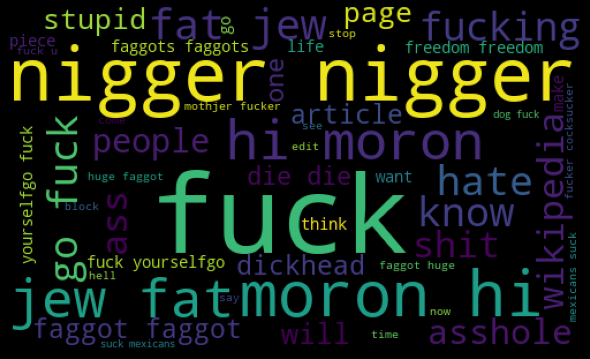

In [68]:
# Loud words in abusive comments

ab = train['comment_text'][train['abuse']==1]
ab_cloud = WordCloud(width=500,height=300,background_color='black',max_words=50).generate(' '.join(ab))
plt.figure(figsize=(8,5),facecolor='k')
plt.imshow(ab_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [69]:
# Vectorization with Tfidf

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(preprocessor=' '.join, stop_words='english',max_features=5000)
tfidf.fit(train['cleaned_text'])

TfidfVectorizer(max_features=5000,
                preprocessor=<built-in method join of str object at 0x00000233C6839230>,
                stop_words='english')

In [70]:
#count of non_toxic and toxic entries
print("Total comments = ",len(train))
print("Total clean comments = ",(train['malignant']== 0).sum())
print("Total malignant comments =",(train['malignant']!= 0).sum())

Total comments =  159571
Total clean comments =  144277
Total malignant comments = 15294


In [71]:
# Resampling - downsampling the majority

from sklearn.utils import resample
df_majority = train[train['malignant']== 0]
df_minority = train[train['malignant']!= 0]

df_majority_downsampled = resample(df_majority,
                                  replace=False,
                                  n_samples=15000,
                                  random_state=0)

train1 = pd.concat([df_majority_downsampled,df_minority])

In [72]:
x = tfidf.transform(train1['cleaned_text'])
y = train1['malignant']

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, log_loss, recall_score, f1_score, precision_score

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 85,stratify=y)

In [75]:
model = [MultinomialNB(),DecisionTreeClassifier(),LogisticRegression()]
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    predm_proba = m.predict_proba(x_test)
    print(predm_proba[:,1])
    print("Accuracy score of", m,"is",accuracy_score(y_test,predm))
    print("Classification report \n",classification_report(y_test,predm))
    print("log loss of",m , "is", log_loss(y_test,predm_proba))
    print("\n")

[0.51142461 0.99793784 0.9900778  ... 0.90607046 0.44312306 0.04564474]
Accuracy score of MultinomialNB() is 0.8732464102987292
Classification report 
               precision    recall  f1-score   support

           0       0.89      0.85      0.87      3000
           1       0.86      0.90      0.88      3059

    accuracy                           0.87      6059
   macro avg       0.87      0.87      0.87      6059
weighted avg       0.87      0.87      0.87      6059

log loss of MultinomialNB() is 0.3082645080798593


[0. 1. 1. ... 1. 0. 0.]
Accuracy score of DecisionTreeClassifier() is 0.8237332893216702
Classification report 
               precision    recall  f1-score   support

           0       0.84      0.80      0.82      3000
           1       0.81      0.85      0.83      3059

    accuracy                           0.82      6059
   macro avg       0.82      0.82      0.82      6059
weighted avg       0.82      0.82      0.82      6059

log loss of DecisionTreeClass

In [76]:
from sklearn.model_selection import cross_val_score

for m in model:
    print("Cross_val_score for",m ,'is ',cross_val_score(m,x,y,cv=5).mean())

Cross_val_score for MultinomialNB() is  0.8758830398408171
Cross_val_score for DecisionTreeClassifier() is  0.8290417857067547
Cross_val_score for LogisticRegression() is  0.884630733846351


The performance of Logistic regression and multinomial naive bayes is good, we can also see from the cross_val_score that there is no issue of overfitting.

To confirm its performance with all 6 targets, let us look at the f1 score and log loss in both Logistic regression and multinomialnb with all 6 targets

As the counts of the six targets are different, it is necessary to resample training data for every target. Then we look at the scores achieved.

In [77]:
target_cols= ['malignant','highly_malignant','rude','threat','abuse','loathe']
lr = LogisticRegression()

for i in target_cols:
    df_majority = train[train[i]== 0]
    df_minority = train[train[i]!= 0]

    df_majority_downsampled = resample(df_majority,
                                       replace=False,
                                       n_samples= (train[i]!= 0).sum(),
                                       random_state=0)

    train1 = pd.concat([df_majority_downsampled,df_minority])
    
    x = tfidf.transform(train1['cleaned_text'])
    y = train1[i]
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 85,stratify=y)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    pred_proba = lr.predict_proba(x_test)
    print(i)
    print("Precision: ",precision_score(y_test,pred))
    print("Recall: ", recall_score(y_test,pred))
    print("f1 score: ",f1_score(y_test,pred))
    print("log loss: ", log_loss(y_test,pred_proba))
    print("Cross_val_score: ",cross_val_score(lr,x,y,cv=5).mean())
    print("\n")  

malignant
Precision:  0.9142857142857143
Recall:  0.8473357306309252
f1 score:  0.8795385137427894
log loss:  0.28575665251313226
Cross_val_score:  0.8849222070037452


highly_malignant
Precision:  0.9623287671232876
Recall:  0.8808777429467085
f1 score:  0.9198036006546645
log loss:  0.24300063399597058
Cross_val_score:  0.9247648902821316


rude
Precision:  0.9676354029062088
Recall:  0.8668639053254438
f1 score:  0.9144818976279651
log loss:  0.22982731069772458
Cross_val_score:  0.9211743084242914


threat
Precision:  0.9753086419753086
Recall:  0.8229166666666666
f1 score:  0.8926553672316384
log loss:  0.36681052256902924
Cross_val_score:  0.8985602094240838


abuse
Precision:  0.9324414715719064
Recall:  0.8850793650793651
f1 score:  0.9081433224755701
log loss:  0.26684355501306384
Cross_val_score:  0.907515598474659


loathe
Precision:  0.94
Recall:  0.8362989323843416
f1 score:  0.8851224105461394
log loss:  0.3279716426247401
Cross_val_score:  0.8950177935943062




In [78]:
target_cols= ['malignant','highly_malignant','rude','threat','abuse','loathe']
mnb = MultinomialNB()

for i in target_cols:
    df_majority = train[train[i]== 0]
    df_minority = train[train[i]!= 0]

    df_majority_downsampled = resample(df_majority,
                                       replace=False,
                                       n_samples= (train[i]!= 0).sum(),
                                       random_state=0)

    train1 = pd.concat([df_majority_downsampled,df_minority])
    
    x = tfidf.transform(train1['cleaned_text'])
    y = train1[i]
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 85,stratify=y)
    mnb.fit(x_train,y_train)
    pred=mnb.predict(x_test)
    pred_proba = mnb.predict_proba(x_test)
    print(i)
    print("Precision: ",precision_score(y_test,pred))
    print("Recall: ", recall_score(y_test,pred))
    print("f1 score: ",f1_score(y_test,pred))
    print("log loss: ", log_loss(y_test,pred_proba))
    print("Cross_val_score: ",cross_val_score(lr,x,y,cv=5).mean())
    print("\n")  

malignant
Precision:  0.864907819453274
Recall:  0.8895063746322328
f1 score:  0.8770346494762288
log loss:  0.30559130925542277
Cross_val_score:  0.8849222070037452


highly_malignant
Precision:  0.9069767441860465
Recall:  0.9780564263322884
f1 score:  0.9411764705882352
log loss:  0.23261439079389049
Cross_val_score:  0.9247648902821316


rude
Precision:  0.8867276887871853
Recall:  0.9171597633136095
f1 score:  0.9016870273414775
log loss:  0.26308264099072426
Cross_val_score:  0.9211743084242914


threat
Precision:  0.9019607843137255
Recall:  0.9583333333333334
f1 score:  0.9292929292929293
log loss:  0.3278239640458814
Cross_val_score:  0.8985602094240838


abuse
Precision:  0.8673042438732815
Recall:  0.9212698412698412
f1 score:  0.8934729064039408
log loss:  0.28608067396194303
Cross_val_score:  0.907515598474659


loathe
Precision:  0.889261744966443
Recall:  0.9430604982206405
f1 score:  0.915371329879102
log loss:  0.3021608987848475
Cross_val_score:  0.8950177935943062




We can see that MultinomialNb is performing better than logistic regression. The performance is better after resampling training data with respect to each target. The cross val score does not reveal any overfitting. Hence MultinomialNB can be considered as the best algorithm for this problem.
We save the model using joblib and use it to predict test data.

In [79]:
# Saving the model

import joblib
joblib.dump(mnb,"malignant_comments_classification.pkl")

['malignant_comments_classification.pkl']

In [80]:
# Loading the model

joblib_model = joblib.load('malignant_comments_classification.pkl')
joblib_model

MultinomialNB()

In [81]:
# Vectorization of test data

test_data = tfidf.transform(test['cleaned_text'])

In [82]:
# Predicting the target

submission = pd.DataFrame()
target_cols= ['malignant','highly_malignant','rude','threat','abuse','loathe']
for i in target_cols:
    df_majority = train[train[i]== 0]
    df_minority = train[train[i]!= 0]

    df_majority_downsampled = resample(df_majority,
                                       replace=False,
                                       n_samples=(train[i]!= 0).sum(),
                                       random_state=0)

    train1 = pd.concat([df_majority_downsampled,df_minority])
    
    x = tfidf.transform(train1['cleaned_text'])
    y = train1[i]
    joblib_model.fit(x,y) # fit is used here as the model needs to be fit for different targets
    submission[i] = joblib_model.predict_proba(test_data)[:,1]

submission.head()

malignant  highly_malignant      rude    threat     abuse    loathe
0   0.999031          0.992406  0.998017  0.932536  0.996456  0.975344
1   0.122526          0.251842  0.113905  0.381422  0.129567  0.245398
2   0.214062          0.132690  0.185339  0.219416  0.182880  0.233518
3   0.082764          0.130317  0.069100  0.231436  0.084765  0.091440
4   0.389622          0.186323  0.350893  0.255486  0.328598  0.203158

In [83]:
# storing output as a csv file

submission.to_csv(r'C:\Users\Lavanya\OneDrive\Desktop\ipnyb files\Internship\Malignant comments classification\comments classification - submission.csv',index=False)